

# Project: Investigate a Dataset (TMDb Movie Data Set)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#exploring the shape of data
df.shape

(10866, 21)

### we have 10866 raws and 21 columns

In [5]:
#check for duplicates in data 
df.duplicated().sum()

1

### we have just one duplicated line in our data

In [6]:
df. original_title.nunique()

10571

we have 10571 unique original_title from 10866 at our data

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#inspection for missing values or any problem can be handeled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 

In [9]:
#remove the columns not used at the analysis
df.drop(['id','imdb_id','homepage','tagline','overview'],axis=1,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#remove the duplicated line
df.drop_duplicates(inplace=True)

In [11]:
#exploring the shape of data after removing the duplicated line
df.shape

(10865, 16)

In [12]:
#removing the rows that containing the same movie name
df.drop_duplicates(['original_title'],inplace=True)
df.shape

(10571, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10571 non-null  float64
 1   budget                10571 non-null  int64  
 2   revenue               10571 non-null  int64  
 3   original_title        10571 non-null  object 
 4   cast                  10497 non-null  object 
 5   director              10528 non-null  object 
 6   keywords              9104 non-null   object 
 7   runtime               10571 non-null  int64  
 8   genres                10548 non-null  object 
 9   production_companies  9552 non-null   object 
 10  release_date          10571 non-null  object 
 11  vote_count            10571 non-null  int64  
 12  vote_average          10571 non-null  float64
 13  release_year          10571 non-null  int64  
 14  budget_adj            10571 non-null  float64
 15  revenue_adj        

In [14]:
# removing all rows that containing null values 
df.dropna(inplace=True)
#exploring the shape of data after removing the null values
df.shape

(8406, 16)

In [18]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            8406 non-null   float64
 1   budget                8406 non-null   int64  
 2   revenue               8406 non-null   int64  
 3   original_title        8406 non-null   object 
 4   cast                  8406 non-null   object 
 5   director              8406 non-null   object 
 6   keywords              8406 non-null   object 
 7   runtime               8406 non-null   int64  
 8   genres                8406 non-null   object 
 9   production_companies  8406 non-null   object 
 10  release_date          8406 non-null   object 
 11  vote_count            8406 non-null   int64  
 12  vote_average          8406 non-null   float64
 13  release_year          8406 non-null   int64  
 14  budget_adj            8406 non-null   float64
 15  revenue_adj         

Now the data is clean and ready to be analyzed

<a id='eda'></a>
## Exploratory Data Analysis
Now using data visualization to understand our data more

### Research Question 1 (General look)

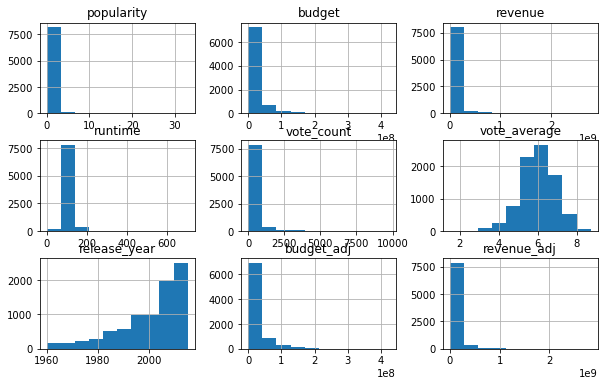

In [40]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(10,6));

## the most movies released after year 2000 ,most vote average between 6 and 6.5, no movie has runtime above 200 minutes,

### Research Question 2  (How Run time of movies changed over the years?)

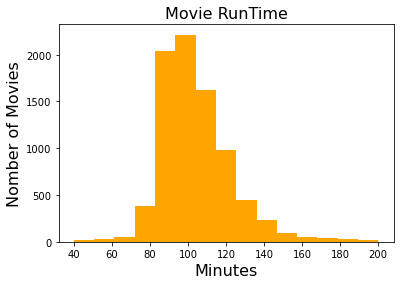

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.hist(df['runtime'],range=(40,200),bins=15,color='orange')
plt.title('Movie RunTime',fontsize=16)
plt.xlabel('Minutes',fontsize=16)
plt.ylabel('Nomber of Movies',fontsize=16)
plt.show()

## from the Histogram we can see the most of movies have mean time between 90 and 110 Minutes

## Research Question 3  (which year has the most nomber of movies released?)

C:\Users\alex\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


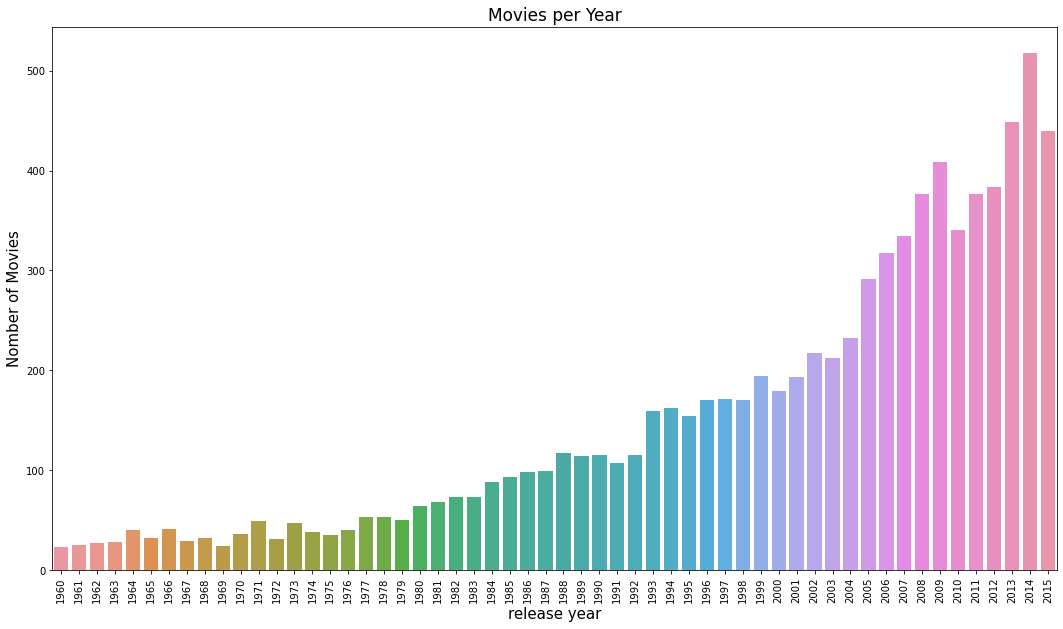

In [34]:
plt.figure(figsize=(18,10))
sns.countplot(df['release_year'])
plt.title('Movies per Year',fontsize=17)
plt.xlabel('release year',fontsize=15)
plt.ylabel('Nomber of Movies',fontsize=15)
plt.xticks(rotation=90)
plt.show()


## from the grave we can see that 2014 had the most nomber of movies

## Research Question 4 (Which genres are most popular from year to year ?)

In [36]:
df_gen=df['genres'].str.get_dummies(sep='|')
df_gen1=df_gen.sum().reset_index()

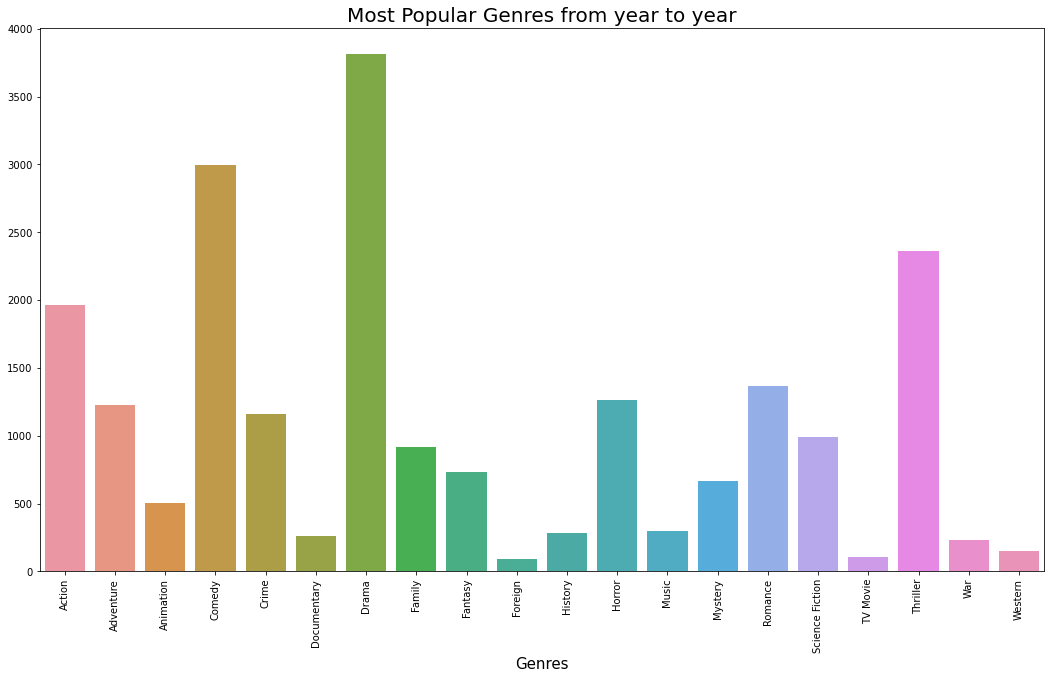

In [38]:
plt.figure(figsize=(18,10))
sns.barplot(x=df_gen.columns,y=df_gen.sum(),data=df_gen1)
plt.title('Most Popular Genres from year to year',fontsize=20)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

## from the grave above we can see that the most popular genres over the year(Drama,Comedy,thriller and Acthion) 

## Research Question 5 (which directors with the most nomber of Movies ?)

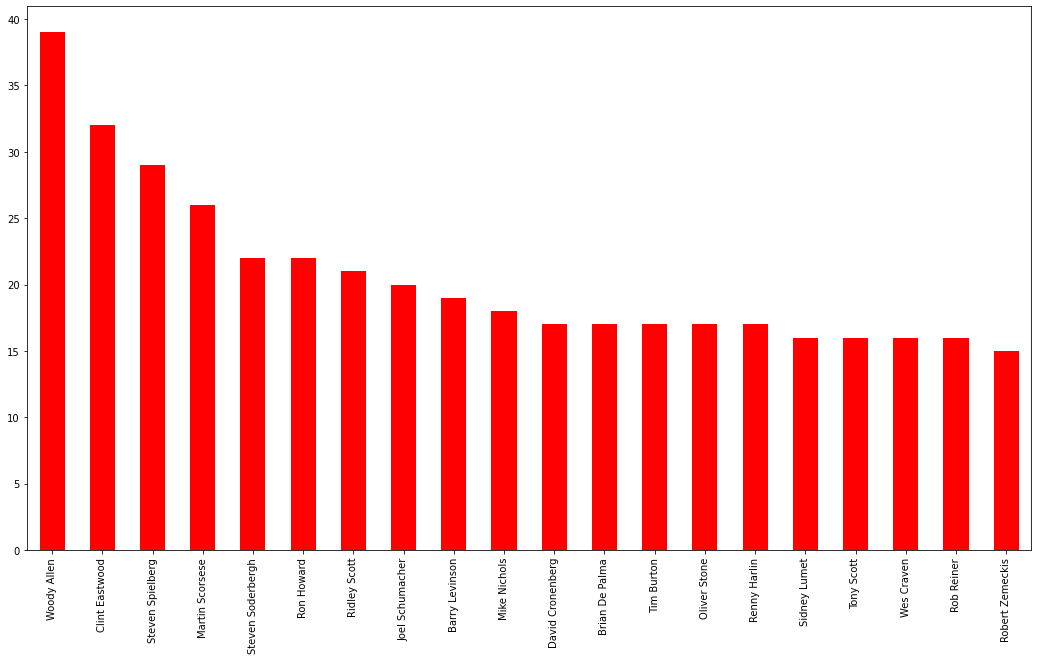

In [43]:
df['director'].value_counts().head(20).plot.bar(figsize=(18,10),color='red');

## from the graph above we can see the most 20 directors that have the most nomber of movies 

<a id='conclusions'></a>
## Conclusions




## we conclude that:
### 1- the most movies released after year 2000 ,most vote average between 6 and 6.5, no movie has runtime above 200 minutes
### 2- the most of movies have mean time between 90 and 110 Minutes
### 3- 2014 had the most nomber of movies released
### 4-the most popular genres over the year(Drama,Comedy,thriller and Acthion)
### 5- the director has the most nomber of movies is (Woody Allen)

## Limitation:
### the data processed above has around 50% of budget data is zero, which affects profit calculation
### then i removed the null values and worked at the rest of the data